In [38]:
import pandas as pd

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [39]:
# Merging data for analysis
data = transactions.merge(products, on='ProductID').merge(customers, on='CustomerID')

# Convert date columns to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])


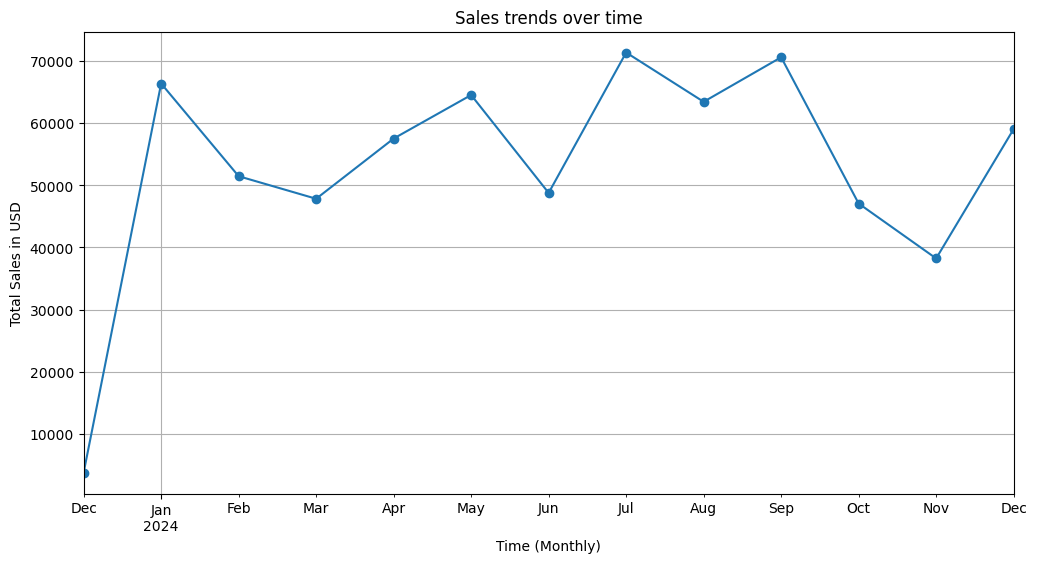

In [41]:
# Sales trend over time 
plt.figure(figsize=(12, 6))
sales_trends = data.groupby(data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
sales_trends.plot(kind='line', marker='o')
plt.title('Sales trends over time')
plt.xlabel('Time (Monthly)')
plt.ylabel('Total Sales in USD')
plt.grid()
plt.show()


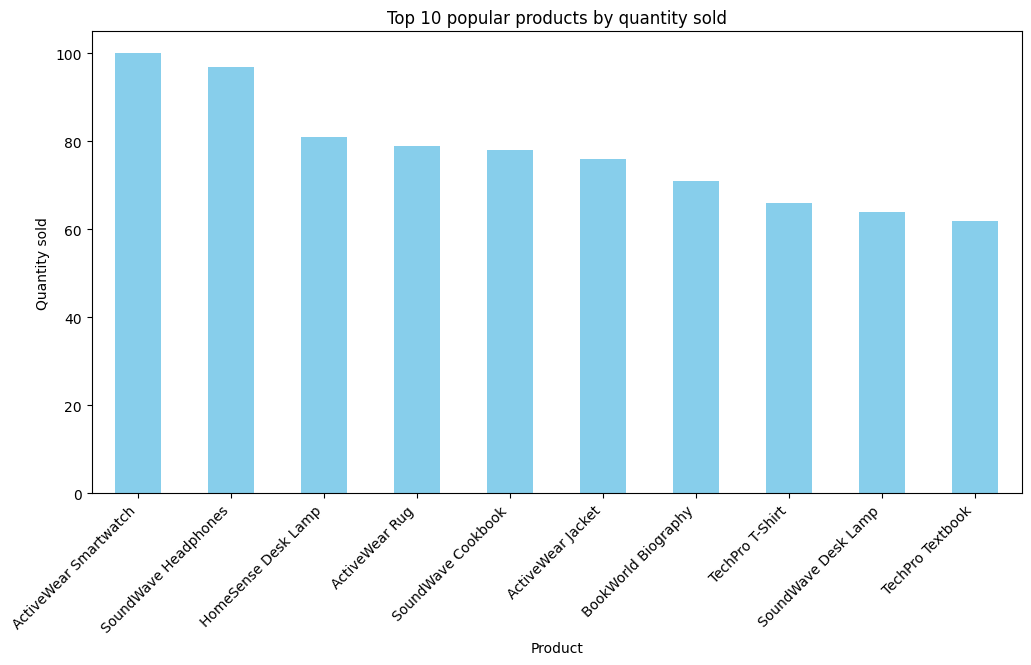

In [42]:
# Top 10 popular products
plt.figure(figsize=(12, 6))
popular_products = data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 popular products by quantity sold')
plt.xlabel('Product')
plt.ylabel('Quantity sold')
plt.xticks(rotation=45, ha='right')
plt.show()

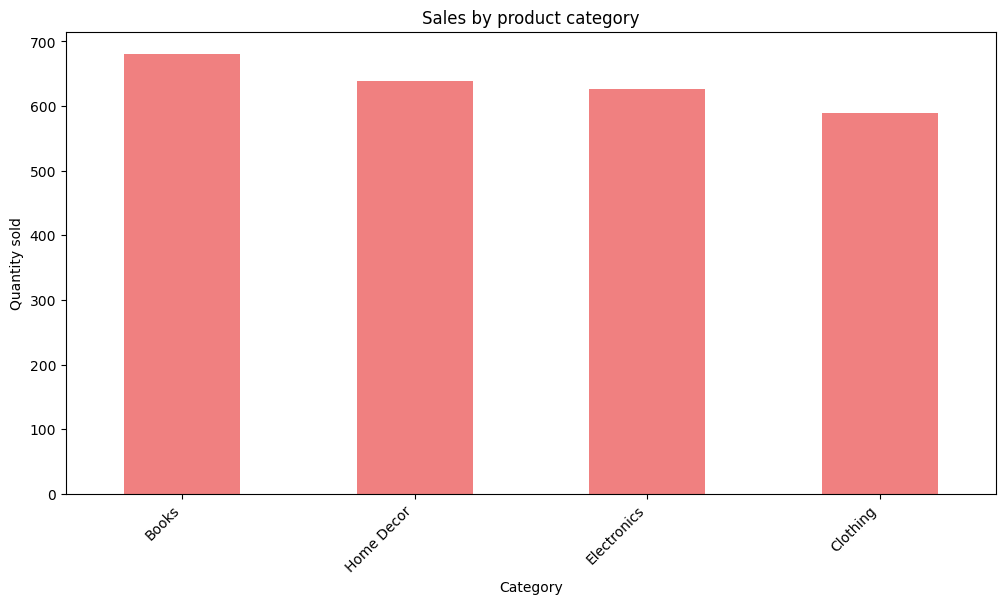

In [43]:
# Popular categories
plt.figure(figsize=(12, 6))
popular_categories = data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
popular_categories.plot(kind='bar', color='lightcoral')
plt.title('Sales by product category')
plt.xlabel('Category')
plt.ylabel('Quantity sold')
plt.xticks(rotation=45, ha='right')
plt.show()

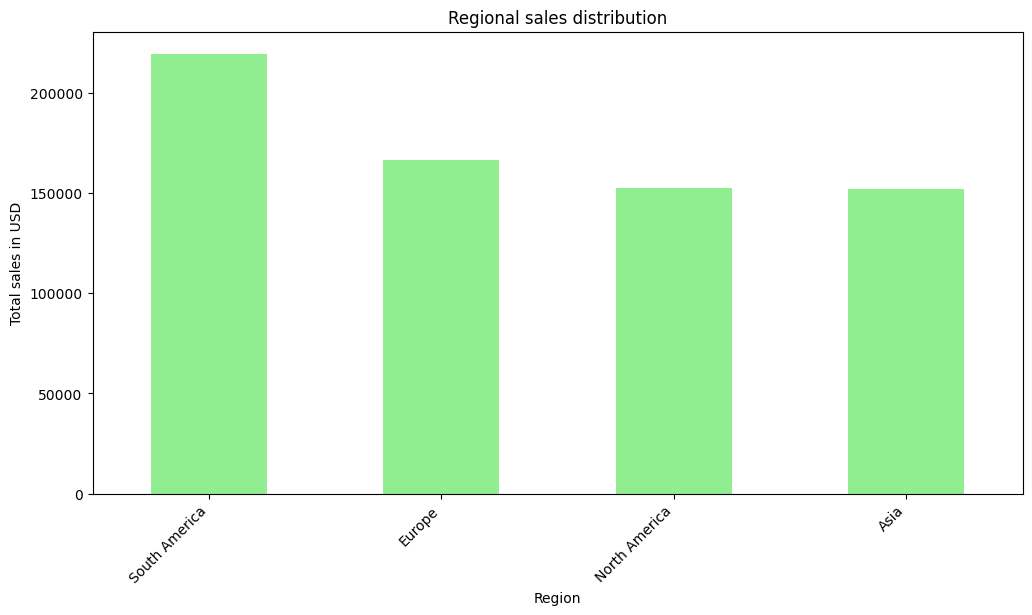

In [44]:
# Regional sales distribution
plt.figure(figsize=(12, 6))
regional_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
regional_sales.plot(kind='bar', color='lightgreen')
plt.title('Regional sales distribution')
plt.xlabel('Region')
plt.ylabel('Total sales in USD')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
# Identifying customers who repeatedly bought products
repeat_customers = data.groupby('CustomerID')['TransactionID'].count().reset_index()
repeat_customers.columns = ['CustomerID', 'PurchaseCount']

In [46]:
# Categorizing customers based on purchase frequency
repeat_customers['CustomerType'] = repeat_customers['PurchaseCount'].apply(
    lambda x: 'Repeat Customer' if x > 1 else 'One-Time Buyer'
)

In [47]:
# Counting the number of repeat customers and one-time buyers
customer_type_counts = repeat_customers['CustomerType'].value_counts()

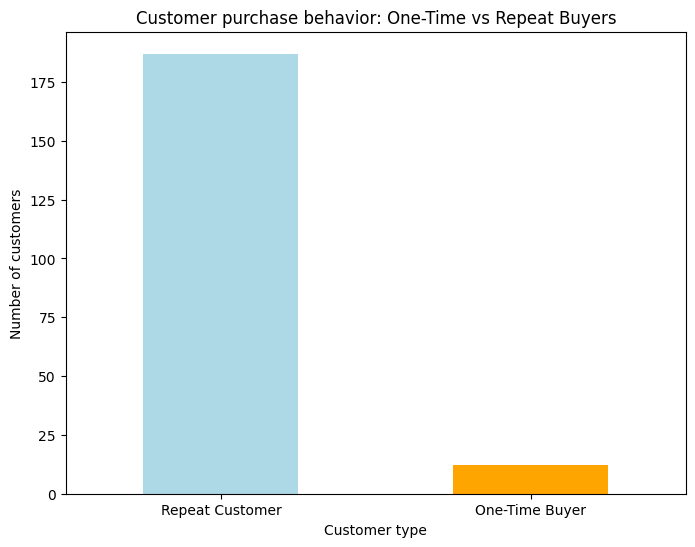

In [48]:
# Visualizing Repeat vs One-Time Customers
plt.figure(figsize=(8, 6))
customer_type_counts.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Customer purchase behavior: One-Time vs Repeat Buyers')
plt.xlabel('Customer type')
plt.ylabel('Number of customers')
plt.xticks(rotation=0)
plt.show()

In [49]:
# Analyze purchase behavior of repeat customers
repeat_customer_data = data[data['CustomerID'].isin(repeat_customers[repeat_customers['CustomerType'] == 'Repeat Customer']['CustomerID'])]

In [50]:
# Calculating the total amount spent by repeat customers
repeat_customer_spending = repeat_customer_data.groupby('CustomerID')['TotalValue'].sum()

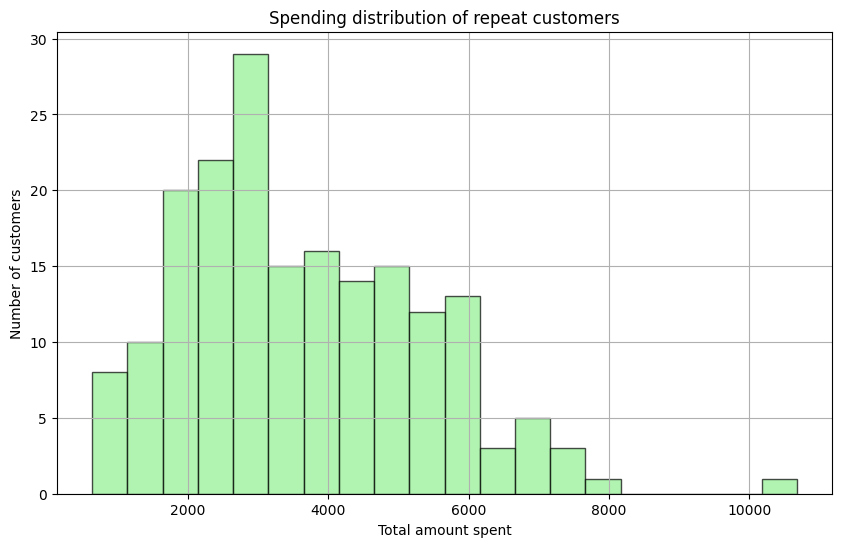

In [51]:
# Visualizing spending distribution
plt.figure(figsize=(10, 6))
repeat_customer_spending.plot(kind='hist', bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Spending distribution of repeat customers')
plt.xlabel('Total amount spent')
plt.ylabel('Number of customers')
plt.grid()
plt.show()

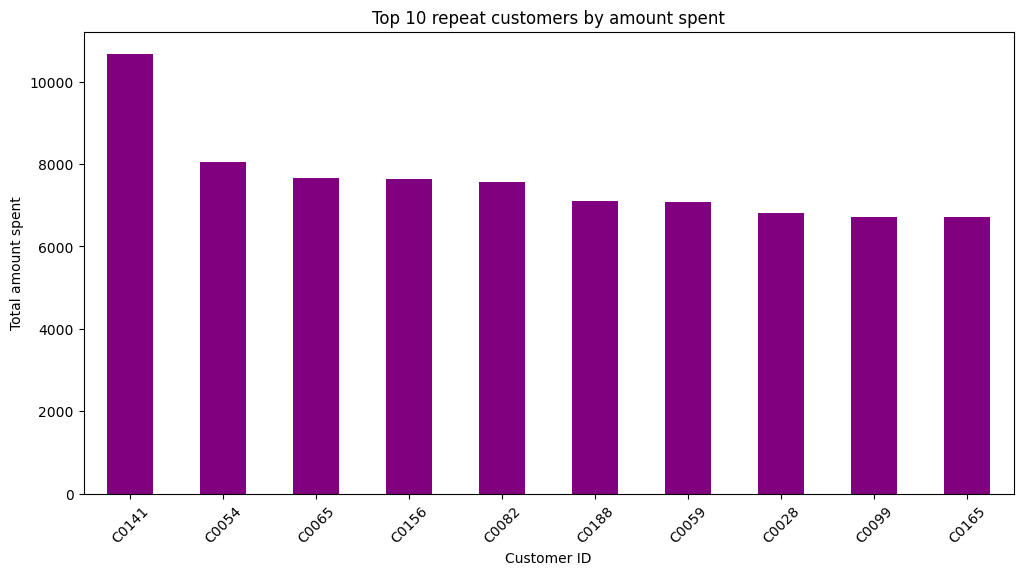

In [35]:
# Top 10 repeat customers by amount spent 
top_repeat_customers = repeat_customer_spending.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_repeat_customers.plot(kind='bar', color='purple')
plt.title('Top 10 repeat customers by amount spent')
plt.xlabel('Customer ID')
plt.ylabel('Total amount spent')
plt.xticks(rotation=45)
plt.show()

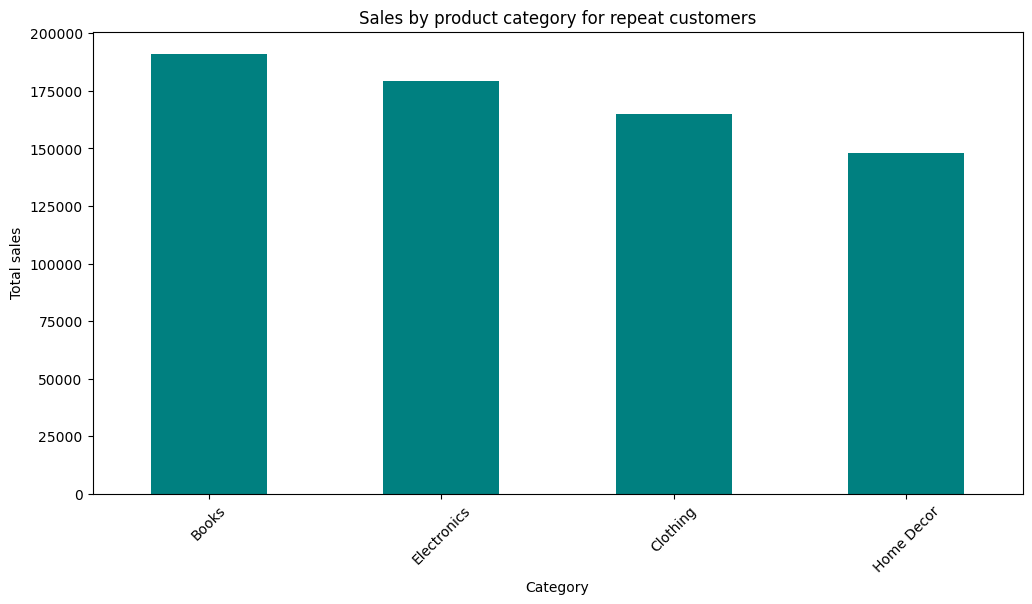

In [37]:
# Sales insights of repeat customer purchases
repeat_category_sales = repeat_customer_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
repeat_category_sales.plot(kind='bar', color='teal')
plt.title('Sales by product category for repeat customers')
plt.xlabel('Category')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.show()